# <span style="color:red"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 12 </span>

In questa esercitazione andremo a sfruttare `Keras` tramite `Tensorflow` per costruire reti neurale profonde (***DNN***) e convolute (***CNN***) che saranno addestrate per il riconoscimento e la classificazione di cifre scritte a mano.

### Esercizio 12.1
Importiamo i dati per il training e il test dal dataset `MNIST`: abbiamo a disposizione $70mila$ campioni di immagini di cifre scritte a mano ( $28\times28$ pixel, in scala di grigi su $256$ valori, ogni pixel assume un valore tra $0$ e $255$ ). Questi dati sono già pre definiti in un campione di training ( $60mila$ ) e di test ( $10mila$ ).

Il problema che volgiamo risolvere è un problema di *classificazione*, con le possibili categorie da $0$ a $9$.

I dati sono elaborati tramite il metodo `to_categorical()` per metterli in forma matriciale.

In [17]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [18]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print()
print("Data before reshape:")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print()
print("Data after reshape:")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

60000 train samples
10000 test samples

Data before reshape:
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

Data after reshape:
X_train shape: (60000, 784)
Y_train shape: (60000, 10)


Con i dati pronti, andiamo a creare delle ***DNN***  utlizzando diversi ottimizzatori. Usiamo come funzione costo da minimizzare la `catecorical_crossentropy`. Utilizziamo come metrica del test il parametro `accuracy`.

La ***DNN*** che usiamo è composta da due *layers* densi di $400$ e $100$ neuroni rispettivamente, e come input ha il numero di pixel. Inseriamo anche un layer *Dropout*; l'output è un layer denso con tanti neuroni quante sono le cifre, e funzione di attivazione *softmax*.

Di seguito riportiamo i risultati ottenuti, di training, test e una prova di predizione delle cifre. In particolare guardiamo alla `accuracy` e alla `loss` dei vari modelli.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

# Models with different optimizers ########

# SGD
def compile_model_SGD():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

# Adagrad
def compile_model_Adagrad():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

# RMSprop
def compile_model_RMSprop():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    return model

def compile_model_Adam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

print('Models compiled successfully and ready to be trained.')

Model architecture created successfully!
Models compiled successfully and ready to be trained.


## SGD

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7603 - accuracy: 0.7759 - val_loss: 0.3200 - val_accuracy: 0.9097
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3943 - accuracy: 0.8871 - val_loss: 0.2494 - val_accuracy: 0.9290
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3182 - accuracy: 0.9098 - val_loss: 0.2067 - val_accuracy: 0.9391
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2752 - accuracy: 0.9226 - val_loss: 0.1810 - val_accuracy: 0.9477
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2394 - accuracy: 0.9329 - val_loss: 0.1652 - val_accuracy: 0.9512


313/313 [==============================] - 2s 5ms/step - loss: 0.1652 - accuracy: 0.9512

Test loss: 0.16515401005744934
Test accuracy: 0.951200008392334


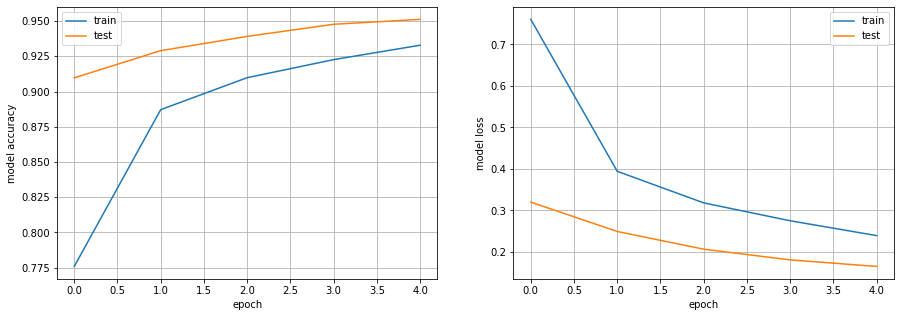

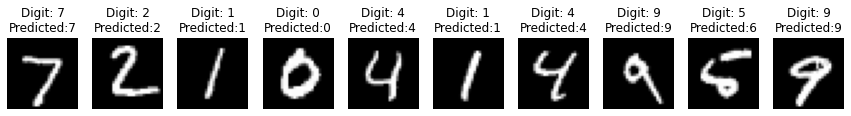

In [71]:
#SGD

######################################################

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_SGD = compile_model_SGD()

# train DNN and store training info in history
history = model_DNN_SGD.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

#######################################################

# evaluate model
print()
print()
score = model_DNN_SGD.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_ylabel('model accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='best')
axs[0].grid(True)

# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_ylabel('model loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='best')
axs[1].grid(True)

plt.show()

##########################################################

# Prediction

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN_SGD.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')

plt.show()

## Adagrad

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2951 - accuracy: 0.6158 - val_loss: 0.6373 - val_accuracy: 0.8686
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7091 - accuracy: 0.8004 - val_loss: 0.4482 - val_accuracy: 0.8947
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5763 - accuracy: 0.8362 - val_loss: 0.3794 - val_accuracy: 0.9041
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5115 - accuracy: 0.8553 - val_loss: 0.3439 - val_accuracy: 0.9112
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4720 - accuracy: 0.8676 - val_loss: 0.3204 - val_accuracy: 0.9149


313/313 [==============================] - 1s 4ms/step - loss: 0.3204 - accuracy: 0.9149

Test loss: 0.3204185962677002
Test accuracy: 0.914900004863739


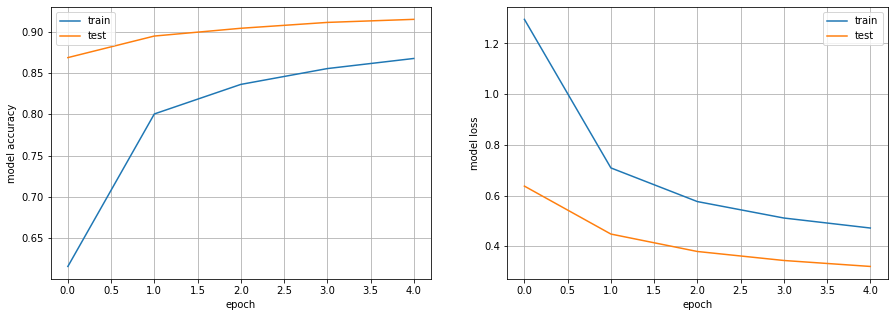

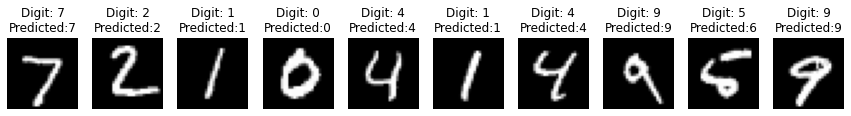

In [77]:
#Adagrad

######################################################

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_Adagrad = compile_model_Adagrad()

# train DNN and store training info in history
history = model_DNN_Adagrad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

#######################################################

# evaluate model
print()
print()
score = model_DNN_Adagrad.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

fig1, axs1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# summarize history for accuracy
axs1[0].plot(history.history['accuracy'])
axs1[0].plot(history.history['val_accuracy'])
axs1[0].set_ylabel('model accuracy')
axs1[0].set_xlabel('epoch')
axs1[0].legend(['train', 'test'], loc='best')
axs1[0].grid(True)

# summarize history for loss
axs1[1].plot(history.history['loss'])
axs1[1].plot(history.history['val_loss'])
axs1[1].set_ylabel('model loss')
axs1[1].set_xlabel('epoch')
axs1[1].legend(['train', 'test'], loc='best')
axs1[1].grid(True)

plt.show()

##########################################################

# Prediction

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN_Adagrad.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')

plt.show()

## RMSprop

Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2757 - accuracy: 0.9209 - val_loss: 0.1259 - val_accuracy: 0.9660
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1543 - accuracy: 0.9619 - val_loss: 0.1372 - val_accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1536 - accuracy: 0.9670 - val_loss: 0.1438 - val_accuracy: 0.9718
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1474 - accuracy: 0.9702 - val_loss: 0.1443 - val_accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1522 - accuracy: 0.9703 - val_loss: 0.1556 - val_accuracy: 0.9732


313/313 [==============================] - 1s 5ms/step - loss: 0.1556 - accuracy: 0.9732

Test loss: 0.15561307966709137
Test accuracy: 0.9732000231742859


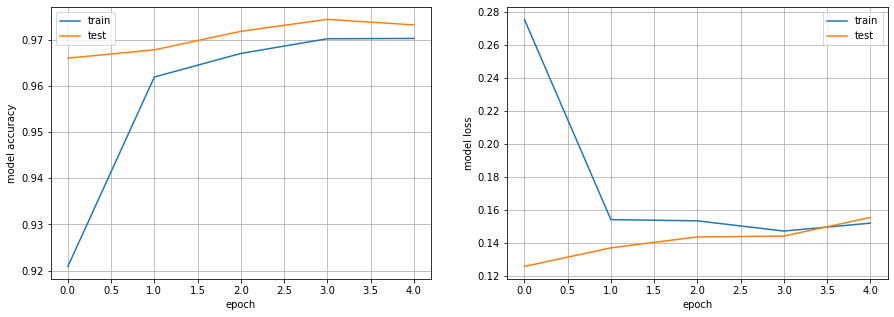

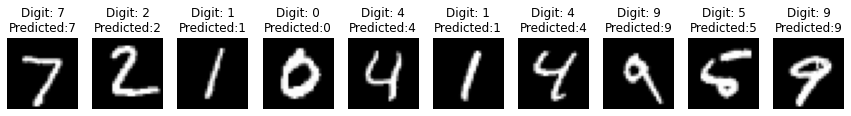

In [79]:
#RMSprop

######################################################

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_RMSprop = compile_model_RMSprop()

# train DNN and store training info in history
history = model_DNN_RMSprop.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

#######################################################

# evaluate model
print()
print()
score = model_DNN_RMSprop.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_ylabel('model accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='best')
axs[0].grid(True)

# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_ylabel('model loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='best')
axs[1].grid(True)

plt.show()

##########################################################

# Prediction

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN_RMSprop.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')

plt.show()

## Adam

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2843 - accuracy: 0.9173 - val_loss: 0.1150 - val_accuracy: 0.9648
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1245 - accuracy: 0.9640 - val_loss: 0.0847 - val_accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0886 - accuracy: 0.9742 - val_loss: 0.0771 - val_accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0703 - accuracy: 0.9797 - val_loss: 0.0762 - val_accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.0843 - val_accuracy: 0.9763


313/313 [==============================] - 1s 3ms/step - loss: 0.0843 - accuracy: 0.9763

Test loss: 0.08430881053209305
Test accuracy: 0.9763000011444092


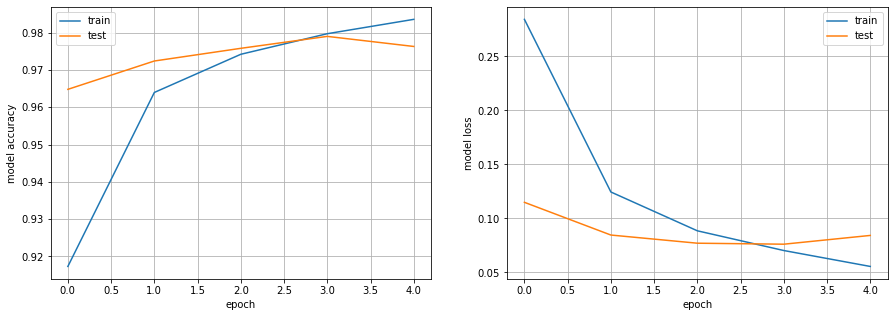

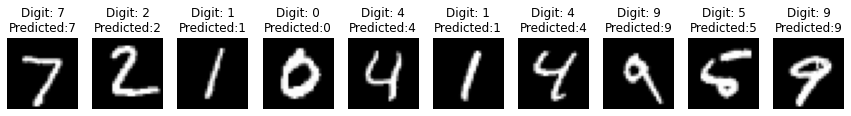

In [83]:
#Adam

######################################################

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_Adam = compile_model_Adam()

# train DNN and store training info in history
history = model_DNN_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

#######################################################

# evaluate model
print()
print()
score = model_DNN_Adam.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_ylabel('model accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='best')
axs[0].grid(True)

# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_ylabel('model loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='best')
axs[1].grid(True)

plt.show()

##########################################################

# Prediction

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN_Adam.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')

plt.show()

In tutti i modelli la precisione è superiore al $90\%$ nei test; in particolare con gli ottimizzatori *Adam* e *RMSprop* risulta piu elevata e stabile all'aumentare delle epoche.

Il costo del modello è  ancora discendente alla fine training e test nel caso di *SGD* e *Adagrad*; si potrebbe pensare di prolungare il training per questi due casi per vedere come evolve il costo; nel caso di *RMSprop* la funzione costo risale durante il test, mentre era stabile nel training. Nel caso di *Adam*, nel test la funzione costo si stabilizza.

### Esercizio 12.2

Costruiamo adesso una rete ***CNN***, utilizzando layers di convoluzioni e di pooling, e un layer di flattening per potere inserire layers densi in successione. Di seguito riportiamo la struttura della rete; la parte finale è uguale alla rete ***DNN*** della sezione precedente.

Compiliamo il modello usando l'ottimizzatore *Adam*.

In [19]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [20]:
def create_CNN():
    # instantiate model
    model = Sequential()
    
    # add first convolutional layer with 10 filters (dimensionality of output space) then pooling
    model.add(Conv2D(10, kernel_size=(5, 5), strides=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    
    #second convolutional layer and pooling
    model.add(Conv2D(16, kernel_size=(5,5), strides=1, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    
    # First dropout
    model.add(Dropout(0.2))
    
    #Flattening
    model.add(Flatten())
    
    #Dense layers
    model.add(Dense(400, activation='relu'))
    model.add(Dense(100, activation='relu'))
    
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    
    #Last layer for output (10 num_classes for digits and softmax)
    model.add(Dense(10, activation='softmax'))  
    
    # compile the model with 
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

In [21]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN = create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2683 - accuracy: 0.9176 - val_loss: 0.0602 - val_accuracy: 0.9810
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1083 - accuracy: 0.9693 - val_loss: 0.0454 - val_accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0825 - accuracy: 0.9761 - val_loss: 0.0330 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0699 - accuracy: 0.9801 - val_loss: 0.0356 - val_accuracy: 0.9896
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0337 - accuracy: 0.9898

Test loss: 0.03372986242175102
Test accuracy: 0.989799976348877


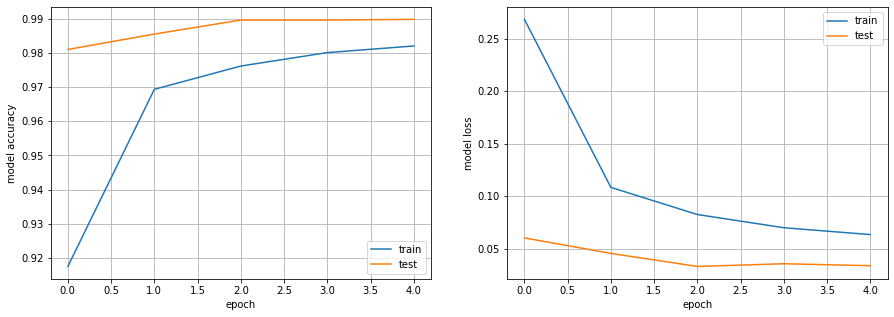

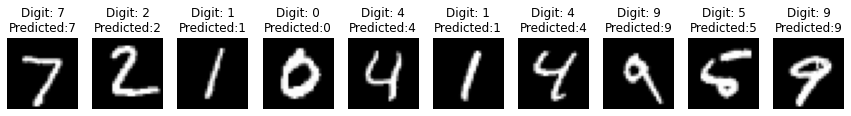

In [28]:
# look into training history

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_ylabel('model accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='best')
axs[0].grid(True)

# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_ylabel('model loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='best')
axs[1].grid(True)

plt.show()


# Prediction

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')

plt.show()

Vediamo come sia la precisione che la funzione costo saturano a valori soddisfacenti; in particolare la precisione è del $99\%$.

### Esercizio 12.3

Vogliamo testare la nostra rete ***CNN***  per vedere se è in grado di riconoscere cifre scritte a mano da noi. Utilizziamo l'applicazione `gimp` per creare file adeguati dove scriviamo le cifre, poi immettiamo il file come input alla rete che tenterà di classificare la cifra.

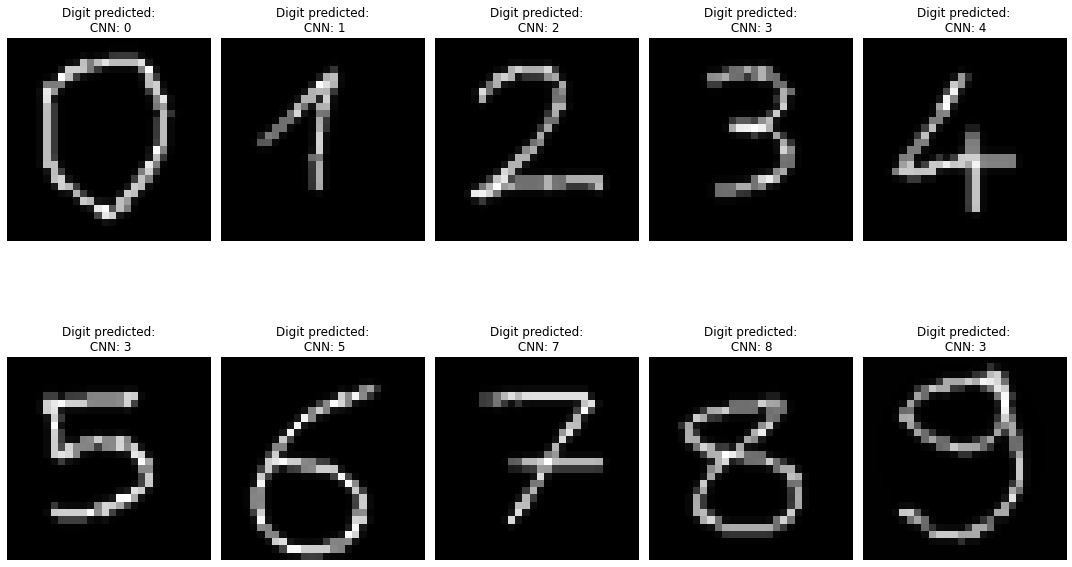

In [48]:
from PIL import Image
import os

fig, axs = plt.subplots(2, 5,figsize = (15,10))
axs = axs.flatten()

for digit in range(10):

    digit_filename = str(digit)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    
    xdim, ydim = digit_in.size
    
    pix = digit_in.load();
    data = np.zeros((xdim, ydim))
    
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
            
    data/=255
    axs[digit].imshow(data, cmap = "gray")
    axs[digit].axis("off")
    
    data = data.reshape(1, xdim, ydim, 1)
    title = "Digit predicted:\n CNN: "+str(np.argmax(model_CNN.predict(data)))
    axs[digit].set_title(title)
    
    
fig.tight_layout()
plt.show()  

Su $10$ cifre, la rete è in grado di riconoscerne $7$.